<a href="https://colab.research.google.com/github/yashk1900/MLpractice/blob/main/mushroom_classifier_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import sklearn

In [124]:
data  = pd.read_csv('/mushrooms.csv')

In [125]:
print(data[0:5])

  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [127]:
Y=data[['class']]
X=data[['cap-shape',               
 'bruises',                 
#  'cap-surface',             
#  'odor',                    
# 'gill-attachment',         
#  'cap-color',               
#  'gill-spacing',            
#  'gill-size',               
#  'gill-color',              
#  'stalk-shape',             
#  'stalk-root',              
#  'stalk-surface-above-ring',
#  'stalk-surface-below-ring',
#  'stalk-color-above-ring',  
#  'stalk-color-below-ring',  
#  'veil-type',               
#  'veil-color',              
#  'ring-number',             
#  'ring-type',               
#  'spore-print-color',
#  'population',              
#  'habitat',
 ]]

In [128]:
X=pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cap-shape_b  8124 non-null   uint8
 1   cap-shape_c  8124 non-null   uint8
 2   cap-shape_f  8124 non-null   uint8
 3   cap-shape_k  8124 non-null   uint8
 4   cap-shape_s  8124 non-null   uint8
 5   cap-shape_x  8124 non-null   uint8
 6   bruises_f    8124 non-null   uint8
 7   bruises_t    8124 non-null   uint8
dtypes: uint8(8)
memory usage: 63.6 KB


In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
Y = LabelEncoder().fit_transform(Y['class'])

In [131]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

In [134]:
clf = RandomForestClassifier(n_estimators=100)

In [135]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
y_pred = clf.predict(X_test)

In [137]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test,y_pred)

array([[877, 390],
       [204, 967]])

In [140]:
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt  

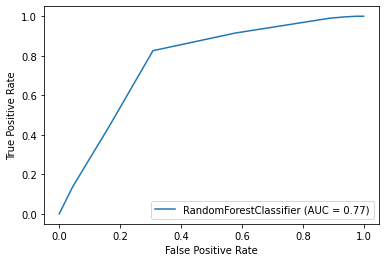

In [141]:
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()